# Personal Protection Equipment Detection model
This notebook shows how you can use Python API to perform inference on endpoint created from the model

### 1. Start the trial or buy our VitechLab PPE model on AWS Marketplace

You can find our model here: https://aws.amazon.com/marketplace/pp/prodview-6gvzwuebead3o

### 2. Create a new endpoint using AWS SageMaker Python API or SageMaker console
You can find our example here: https://github.com/VITechLab/PPE-Detector/blob/master/Using-Personal-Protection-Equipment-Detection-model.ipynb

### 3. Generating Prediction using `RealTimePredictor`

In [44]:
import sagemaker as sage

sess = sage.Session()
endpoint_name = '<YOUR ENDPOINT NAME HERE>'

predictor = sage.predictor.RealTimePredictor(
    endpoint_name,
    sagemaker_session=sess, 
    content_type="image/jpeg"
)

In [16]:
file_name = 'data/test_samples/demo_input/54_11.Welder_in_Egypt_(...jpg'

with open(file_name, 'rb') as image:
    f = image.read()
    image_bytes = bytearray(f)

prediction_result = predictor.predict(image_bytes).decode("utf-8")

In [17]:
import json

result = json.loads(prediction_result)
result

[[73.0, 226.0, 764.0, 1032.0, 0.8809224367141724, 0.9916692972183228, 4.0],
 [482.0, 68.0, 915.0, 427.0, 0.8395098447799683, 0.9984474778175354, 2.0],
 [65.0, 22.0, 895.0, 1096.0, 0.5797771215438843, 0.9999768733978271, 6.0]]

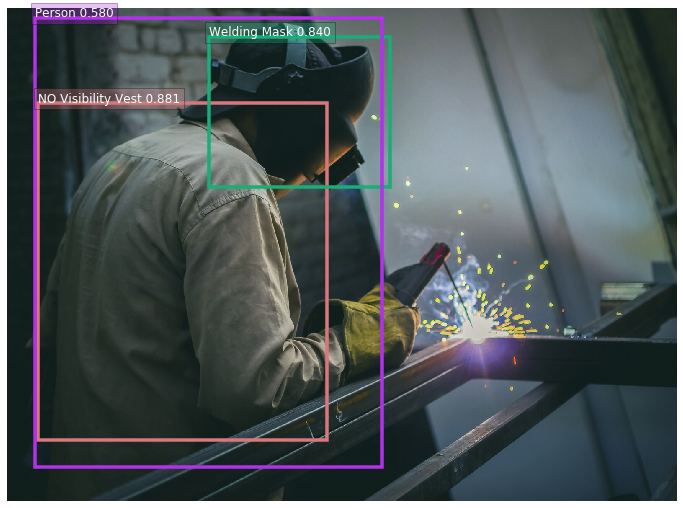

In [21]:
import matplotlib.pyplot as plt
from utils import visualize_detection

plt.rcParams['figure.figsize'] = [12, 12]
visualize_detection(file_name, result)